# 1. Import libraries and read data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date

import matplotlib.pyplot as plt

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [2]:
# read data
full_fpt = pd.read_csv('datasets/FPT.csv')
full_msn = pd.read_csv('datasets/MSN.csv')
full_pnj = pd.read_csv('datasets/PNJ.csv')
full_vic = pd.read_csv('datasets/VIC.csv')

# 2. Preprocessing

In [3]:
# change type of `Date/Time` column to datetime
full_fpt['Date/Time'] = pd.to_datetime(full_fpt['Date/Time'], format = '%m/%d/%Y %H:%M')
full_msn['Date/Time'] = pd.to_datetime(full_msn['Date/Time'], format = '%m/%d/%Y %H:%M')
full_pnj['Date/Time'] = pd.to_datetime(full_pnj['Date/Time'], format = '%m/%d/%Y %H:%M')
full_vic['Date/Time'] = pd.to_datetime(full_vic['Date/Time'], format = '%m/%d/%Y %H:%M')

# get unique dates of each of stocks, we only keep the last moment of the day
full_fpt['Date'] = full_fpt['Date/Time'].dt.date
fpt = full_fpt.drop_duplicates(['Date'], keep='last')
full_msn['Date'] = full_msn['Date/Time'].dt.date
msn = full_msn.drop_duplicates(['Date'], keep='last')
full_pnj['Date'] = full_pnj['Date/Time'].dt.date
pnj = full_pnj.drop_duplicates(['Date'], keep='last')
full_vic['Date'] = full_vic['Date/Time'].dt.date
vic = full_vic.drop_duplicates(['Date'], keep='last')

In [4]:
from collections import Counter

# find the times that appear the most for each of stocks
most_appearning_time_fpt = Counter(fpt['Date/Time'].dt.time)
print('The most appearing time for FPT shares:', most_appearning_time_fpt.most_common())
most_appearning_time_msn = Counter(msn['Date/Time'].dt.time)
print('The most appearing time for MSN shares:', most_appearning_time_msn.most_common())
most_appearning_time_pnj = Counter(pnj['Date/Time'].dt.time)
print('The most appearing time for PNJ shares:', most_appearning_time_pnj.most_common())
most_appearning_time_vic = Counter(vic['Date/Time'].dt.time)
print('The most appearing time for VIC shares:', most_appearning_time_vic.most_common())

The most appearing time for FPT shares: [(datetime.time(14, 46), 495), (datetime.time(14, 29), 2), (datetime.time(9, 21), 1), (datetime.time(14, 30), 1)]
The most appearing time for MSN shares: [(datetime.time(14, 46), 742), (datetime.time(14, 45), 2), (datetime.time(14, 29), 2), (datetime.time(14, 31), 1), (datetime.time(14, 28), 1)]
The most appearing time for PNJ shares: [(datetime.time(14, 46), 704), (datetime.time(14, 45), 2), (datetime.time(14, 29), 2), (datetime.time(11, 26), 1)]
The most appearing time for VIC shares: [(datetime.time(14, 46), 544), (datetime.time(14, 29), 3), (datetime.time(14, 45), 1)]


In [5]:
# keep only records that happened at '14:46:00'
fpt = fpt[(fpt['Date/Time'].dt.time.astype(str) == '14:46:00')]
msn = msn[(msn['Date/Time'].dt.time.astype(str) == '14:46:00')]
pnj = pnj[(pnj['Date/Time'].dt.time.astype(str) == '14:46:00')]
vic = vic[(vic['Date/Time'].dt.time.astype(str) == '14:46:00')]

In [6]:
# reset index
fpt = fpt.set_index('Date')
msn = msn.set_index('Date')
pnj = pnj.set_index('Date')
vic = vic.set_index('Date')

In [7]:
company_list = [fpt, msn, pnj, vic]
company_names = ['FPT', 'MSN', 'PNJ', 'VIC']

# 3. Descriptive Statistics about the Data

In [8]:
fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.0
mean,44.332485,44.332485,44.332485,44.332485,1.059464e+05,0.0
std,6.746388,6.746388,6.746388,6.746388,1.098180e+05,0.0
min,30.440000,30.440000,30.440000,30.440000,2.260000e+03,0.0
25%,38.090000,38.090000,38.090000,38.090000,4.260500e+04,0.0
50%,46.520000,46.520000,46.520000,46.520000,7.402000e+04,0.0
75%,49.080000,49.080000,49.080000,49.080000,1.255900e+05,0.0
max,58.100000,58.100000,58.100000,58.100000,1.255930e+06,0.0


In [9]:
fpt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 2018-12-26 to 2020-12-22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         495 non-null    object        
 1   Date/Time      495 non-null    datetime64[ns]
 2   Open           495 non-null    float64       
 3   High           495 non-null    float64       
 4   Low            495 non-null    float64       
 5   Close          495 non-null    float64       
 6   Volume         495 non-null    int64         
 7   Open Interest  495 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 34.8+ KB


# 4. Visualize

## 4.1. Closing Price

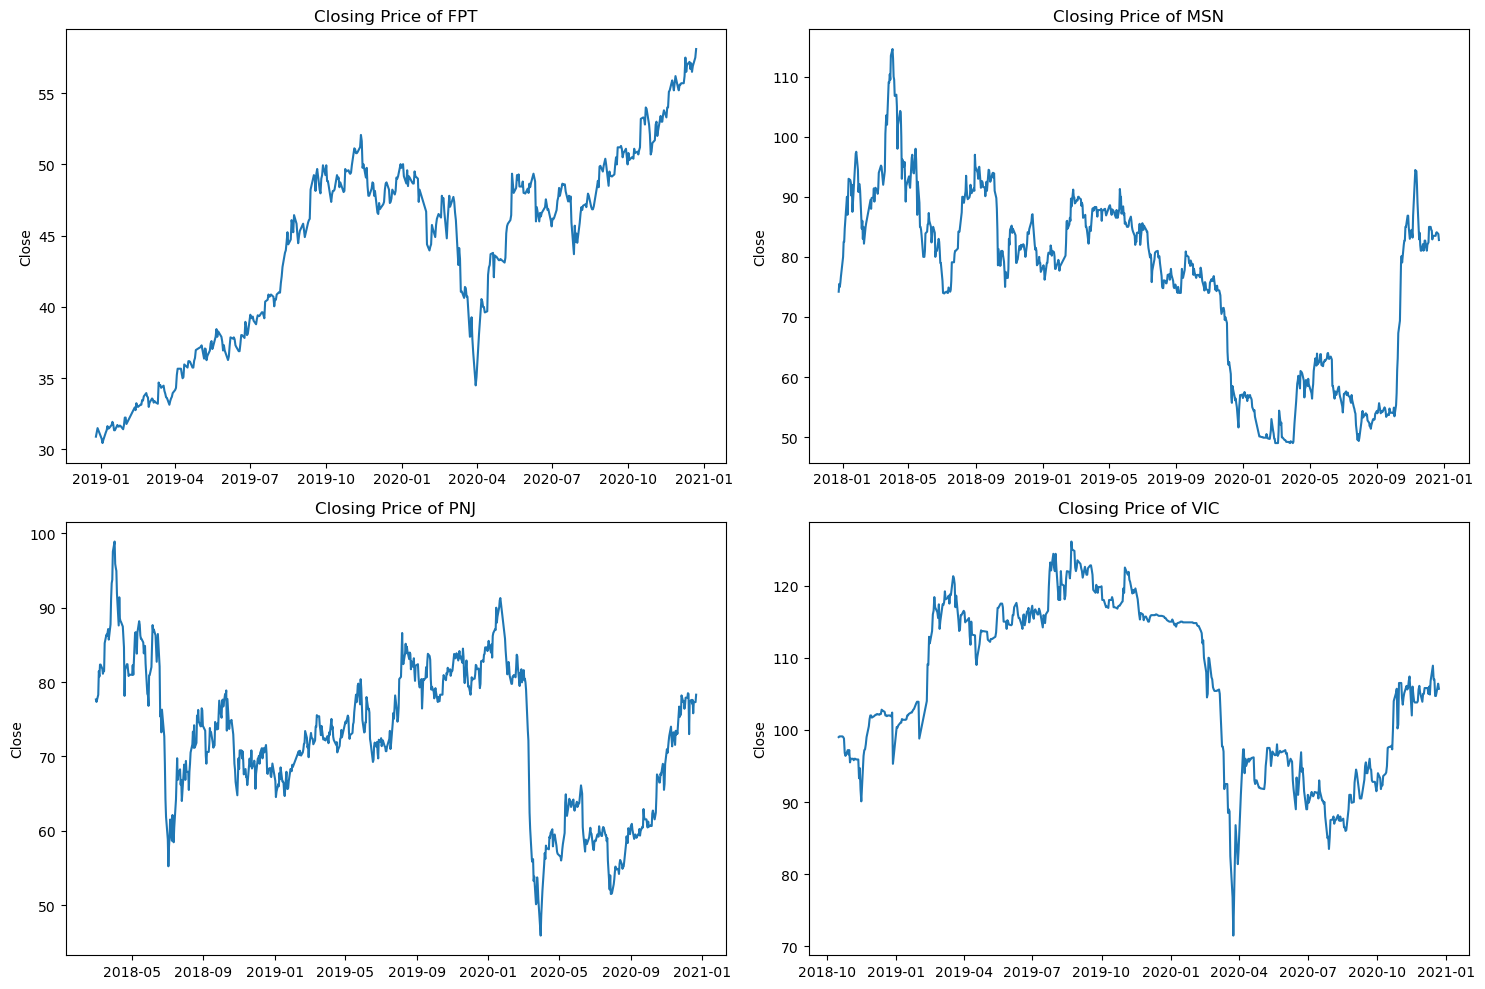

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

## 4.2. Volume

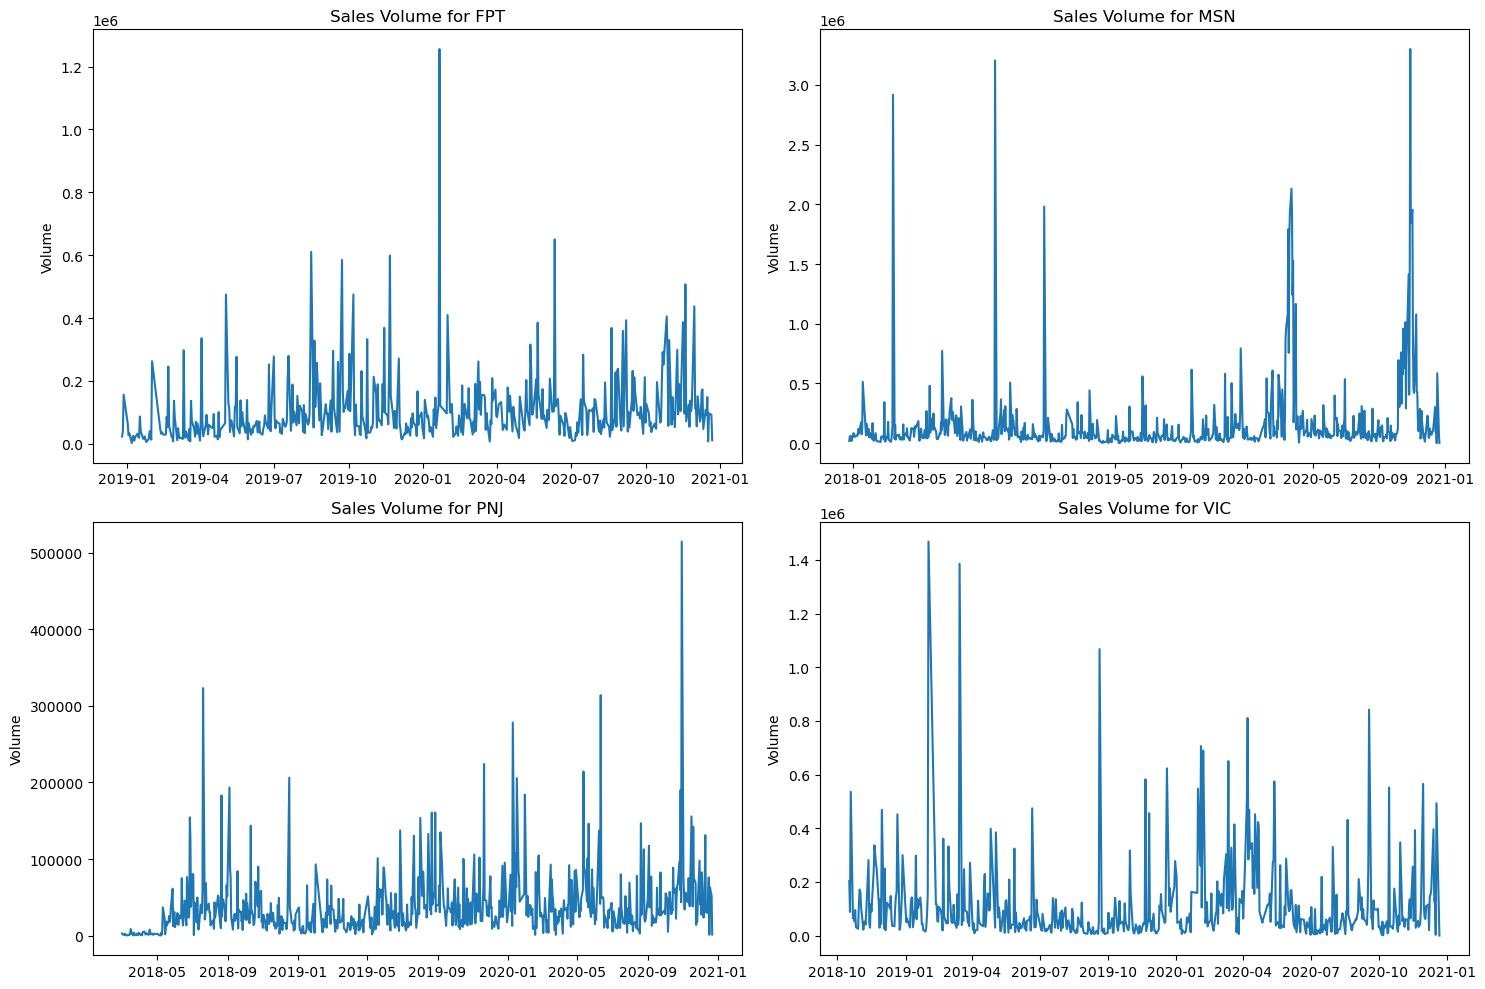

In [11]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}")
    
plt.tight_layout()

# 5. The moving average of the various stocks

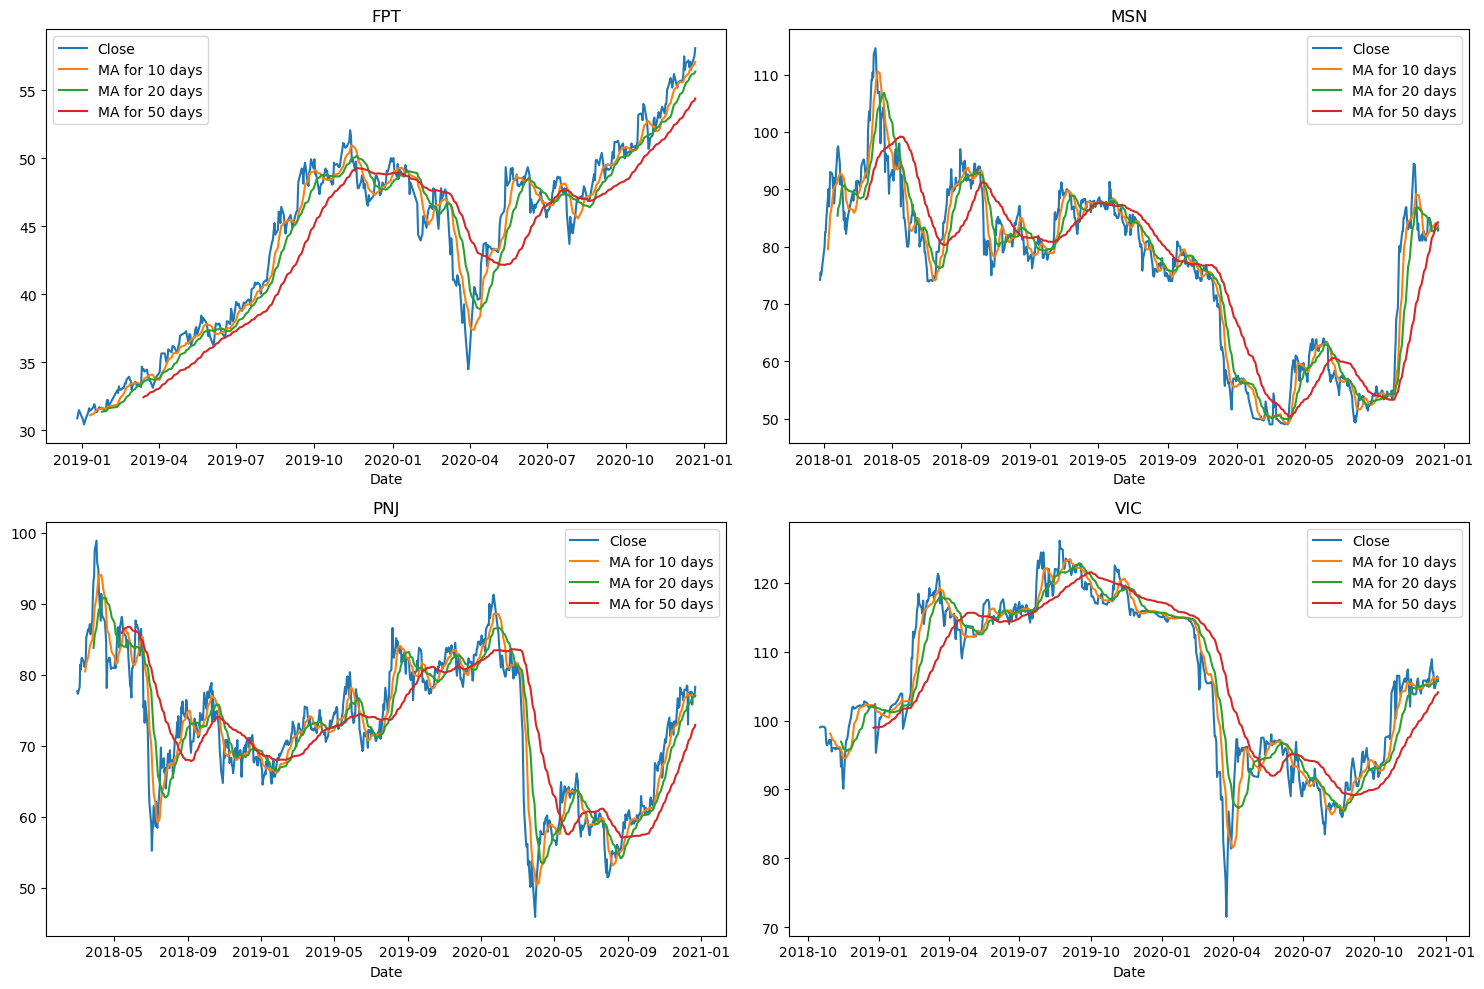

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

fpt[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FPT')

msn[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MSN')

pnj[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('PNJ')

vic[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('VIC')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 6. The daily return of the stock on average

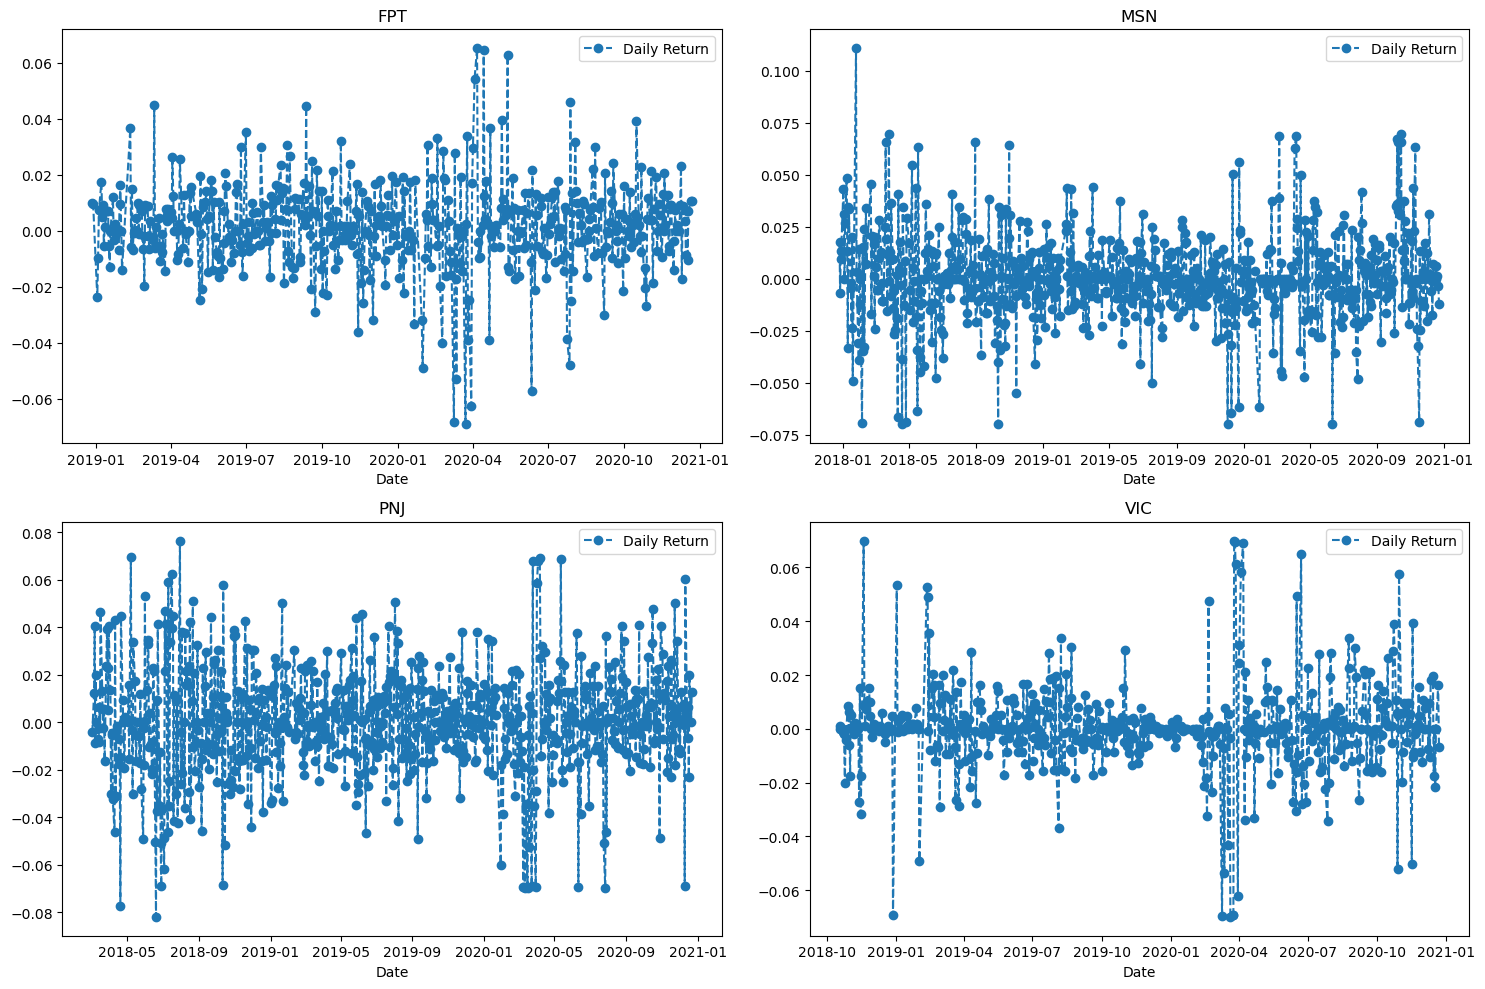

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

fpt['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FPT')

msn['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MSN')

pnj['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('PNJ')

vic['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('VIC')

fig.tight_layout()

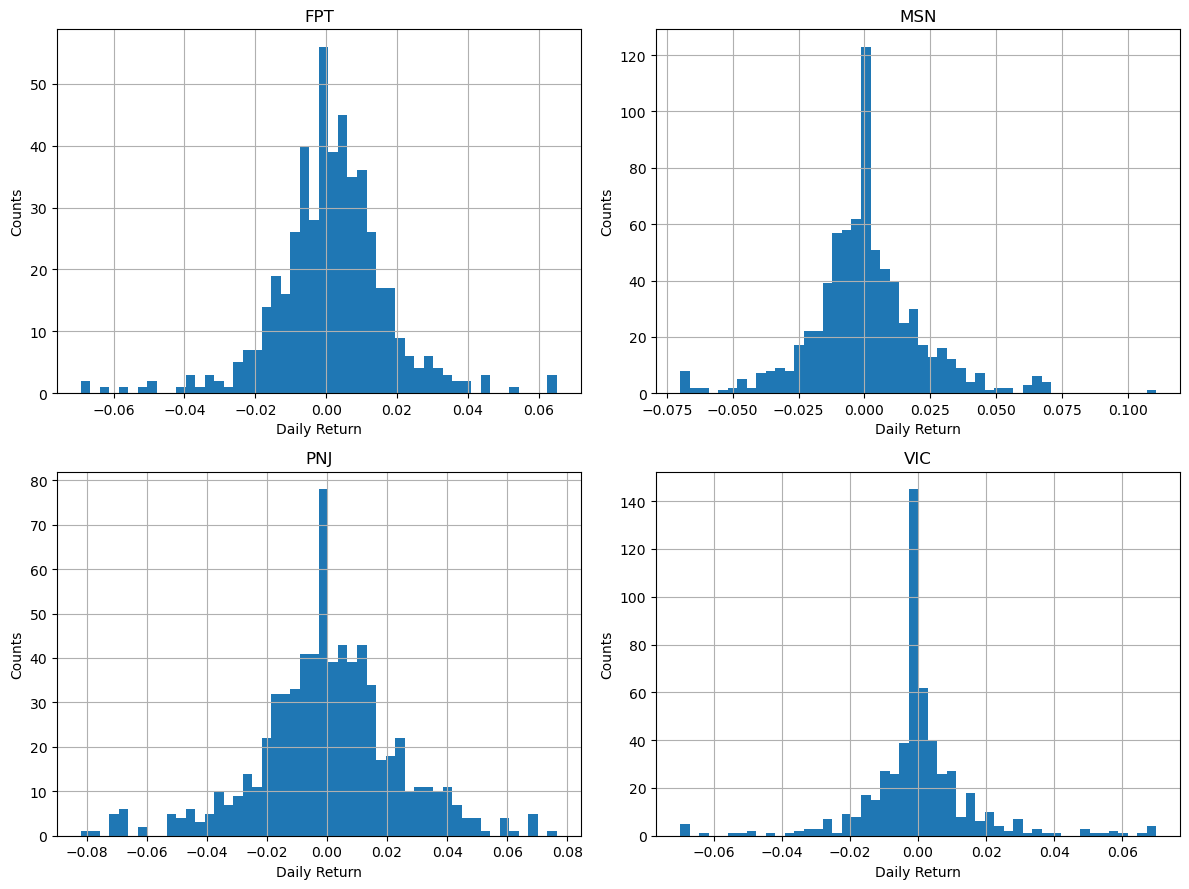

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]}')
    
plt.tight_layout()

# 7. Predicting the closing price stock price of FPT

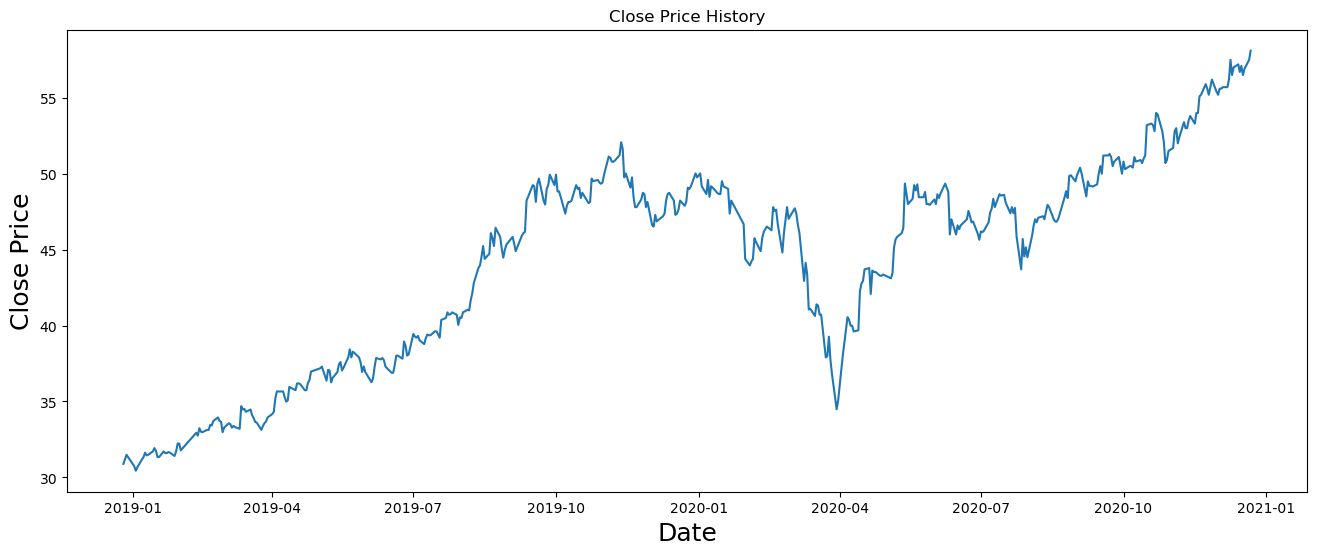

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(fpt['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the 'Close column 
data = fpt.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

471

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [18]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01626898, 0.02711497, 0.03796095, 0.01084599, 0.        ,
       0.00795372, 0.02711497, 0.03253796, 0.04302242, 0.03651482,
       0.03796095, 0.04591468, 0.0538684 , 0.04736081, 0.03253796,
       0.03253796, 0.04591468, 0.04193782, 0.04193782, 0.04446855,
       0.04302242, 0.03506869, 0.04591468, 0.06471439, 0.06471439,
       0.04844541, 0.09038322, 0.0835141 , 0.10122921, 0.09291396,
       0.09182936, 0.09725235, 0.09725235, 0.10918294, 0.1077368 ,
       0.11858279, 0.12689805, 0.11858279, 0.11605206, 0.09182936,
       0.10267534, 0.1131598 , 0.11062907, 0.10267534, 0.10665221,
       0.10375994, 0.09978308, 0.15365148, 0.14569776, 0.14714389,
       0.14027477, 0.14569776, 0.13232104, 0.12545192, 0.11605206,
       0.11460593, 0.09725235, 0.10665221, 0.1131598 , 0.11749819])]
[0.1268980477223427]

[array([0.01626898, 0.02711497, 0.03796095, 0.01084599, 0.        ,
       0.00795372, 0.02711497, 0.03253796, 0.04302242, 0.03651482,
       0.03796095, 0.04591468, 0.053

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

411/411 [==============================] - 14s 26ms/step - loss: 0.0058


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 860ms/step


0.8957284218383883

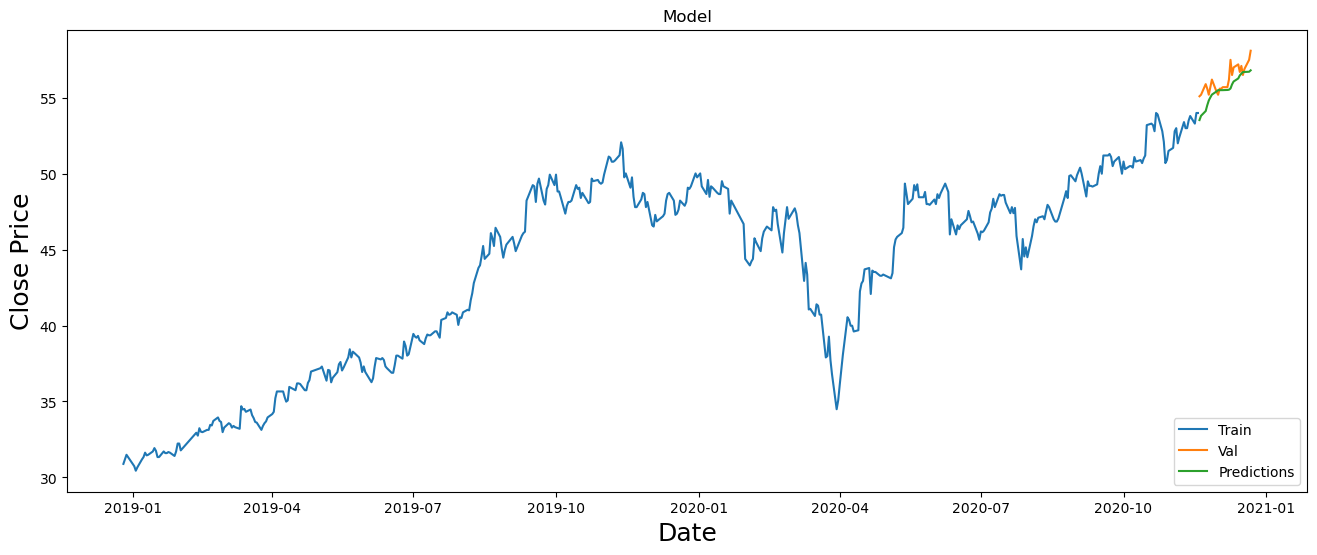

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-19,55.1,53.532688
2020-11-20,55.2,53.815418
2020-11-23,55.9,54.126640
2020-11-24,55.6,54.505875
2020-11-25,55.2,54.825417
2020-11-26,55.7,55.024723
2020-11-27,56.2,55.207741
2020-11-30,55.4,55.419369
2020-12-01,55.2,55.506458


# 8. Predicting the closing price stock price of MSN

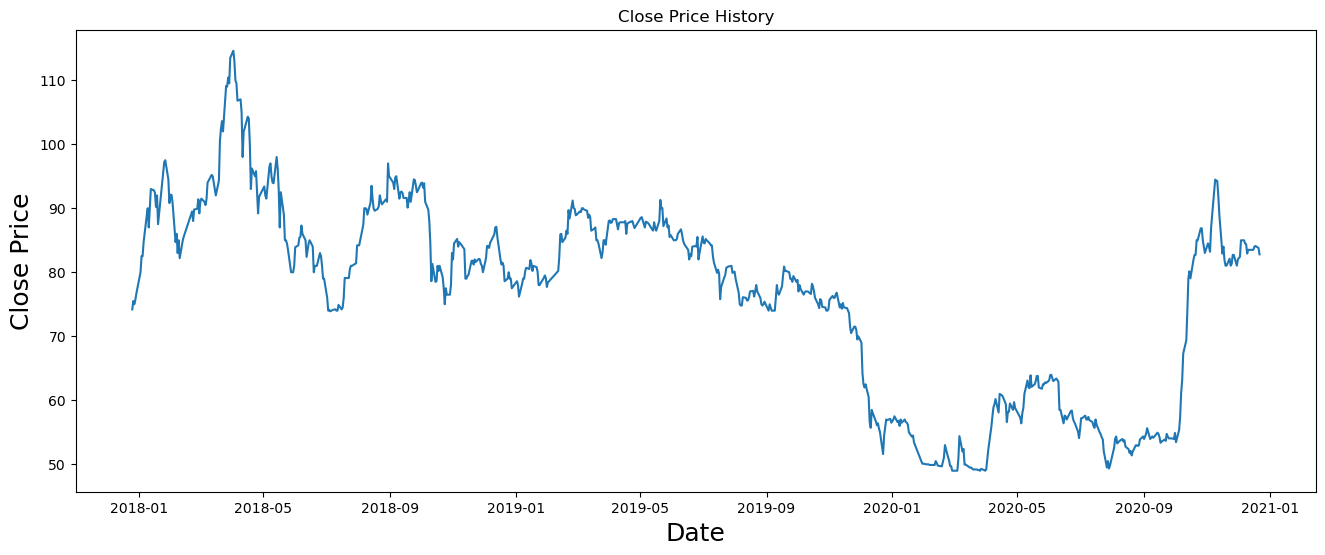

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(msn['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = msn.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

705

In [25]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.38414634, 0.40396341, 0.39634146, 0.4070122 , 0.4222561 ,
       0.47256098, 0.51067073, 0.51067073, 0.54420732, 0.60670732,
       0.625     , 0.57926829, 0.625     , 0.67073171, 0.66768293,
       0.66158537, 0.62804878, 0.6554878 , 0.58689024, 0.7347561 ,
       0.73932927, 0.69359756, 0.63719512, 0.6570122 , 0.6570122 ,
       0.6402439 , 0.54420732, 0.56402439, 0.51829268, 0.54878049,
       0.50609756, 0.54878049, 0.55792683, 0.61737805, 0.5945122 ,
       0.62195122, 0.62347561, 0.64634146, 0.61280488, 0.6402439 ,
       0.64786585, 0.6402439 , 0.63262195, 0.64634146, 0.68597561,
       0.70426829, 0.70121951, 0.68597561, 0.67073171, 0.6554878 ,
       0.69054878, 0.78506098, 0.81402439, 0.83231707, 0.80792683,
       0.91615854, 0.91463415, 0.93597561, 0.9222561 , 0.98323171])]
[1.0]

[array([0.38414634, 0.40396341, 0.39634146, 0.4070122 , 0.4222561 ,
       0.47256098, 0.51067073, 0.51067073, 0.54420732, 0.60670732,
       0.625     , 0.57926829, 0.625     , 0.670731

In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

645/645 [==============================] - 21s 27ms/step - loss: 0.0060


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 15ms/step


3.664477845259957

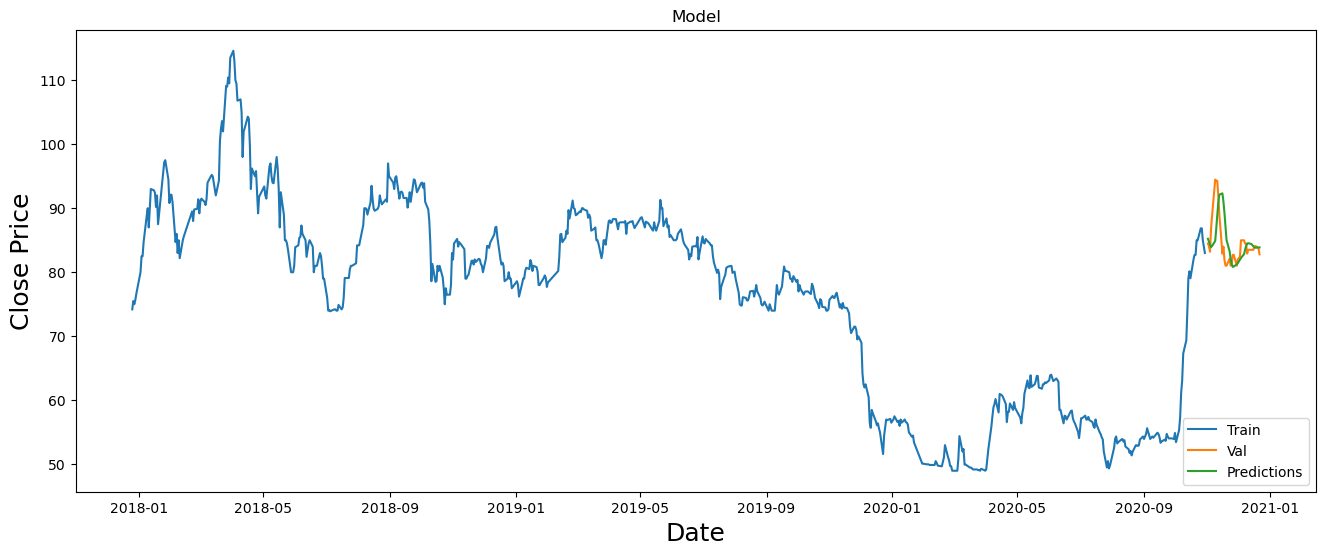

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-02,84.50,85.224854
2020-11-03,84.00,84.760284
2020-11-04,83.21,84.351036
2020-11-05,86.86,83.926300
2020-11-06,88.84,84.101982
2020-11-09,94.47,84.884315
2020-11-10,94.27,86.735695
2020-11-11,94.27,88.878357
2020-11-12,92.00,90.864189


# 9. Predicting the closing price stock price of PNJ

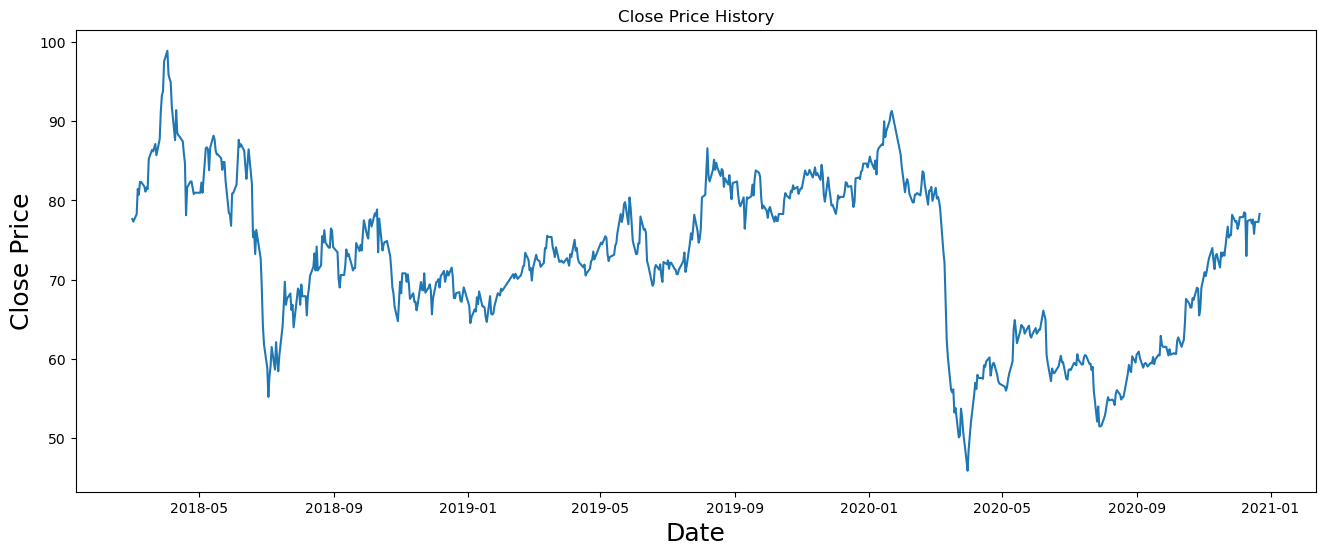

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(pnj['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [32]:
# Create a new dataframe with only the 'Close column 
data = pnj.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

669

In [33]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.59924528, 0.59301887, 0.6109434 , 0.67075472, 0.65735849,
       0.68773585, 0.68773585, 0.67698113, 0.6645283 , 0.67433962,
       0.67075472, 0.74226415, 0.76377358, 0.76018868, 0.7690566 ,
       0.77792453, 0.75113208, 0.78962264, 0.85490566, 0.89415094,
       0.90301887, 0.9745283 , 1.        , 0.94339623, 0.93339623,
       0.9254717 , 0.86735849, 0.78698113, 0.85849057, 0.80490566,
       0.79849057, 0.79584906, 0.78433962, 0.75566038, 0.73169811,
       0.60830189, 0.67433962, 0.68867925, 0.68867925, 0.65867925,
       0.66188679, 0.66188679, 0.68603774, 0.66188679, 0.76811321,
       0.77      , 0.7645283 , 0.7154717 , 0.7690566 , 0.79773585,
       0.78867925, 0.76188679, 0.75301887, 0.75301887, 0.74396226,
       0.71622642, 0.73509434, 0.73509434, 0.69037736, 0.61358491])]
[0.6098113207547168]

[array([0.59924528, 0.59301887, 0.6109434 , 0.67075472, 0.65735849,
       0.68773585, 0.68773585, 0.67698113, 0.6645283 , 0.67433962,
       0.67075472, 0.74226415, 0.763

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

609/609 [==============================] - 20s 27ms/step - loss: 0.0066


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 14ms/step


4.305827094278214

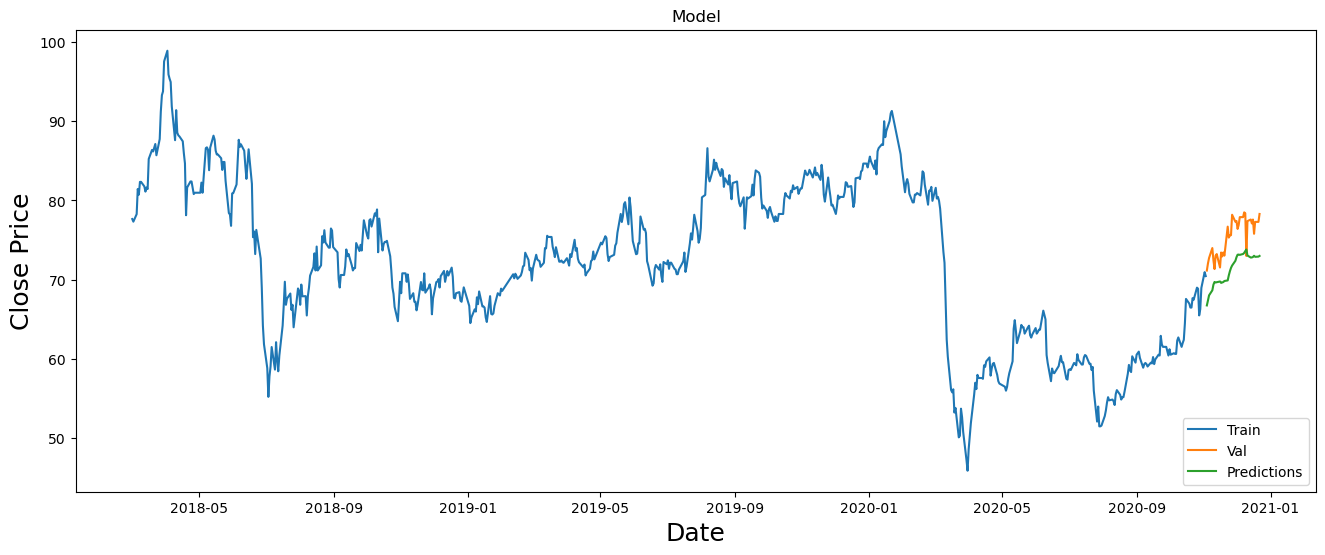

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-04,71.16,66.758858
2020-11-05,72.05,67.378586
2020-11-06,72.74,68.026703
2020-11-09,74.00,68.667999
2020-11-10,72.45,69.380310
2020-11-11,71.35,69.721581
2020-11-12,73.04,69.652199
2020-11-13,73.24,69.686974
2020-11-16,71.55,69.779915


# 10. Predicting the closing price stock price of VIC

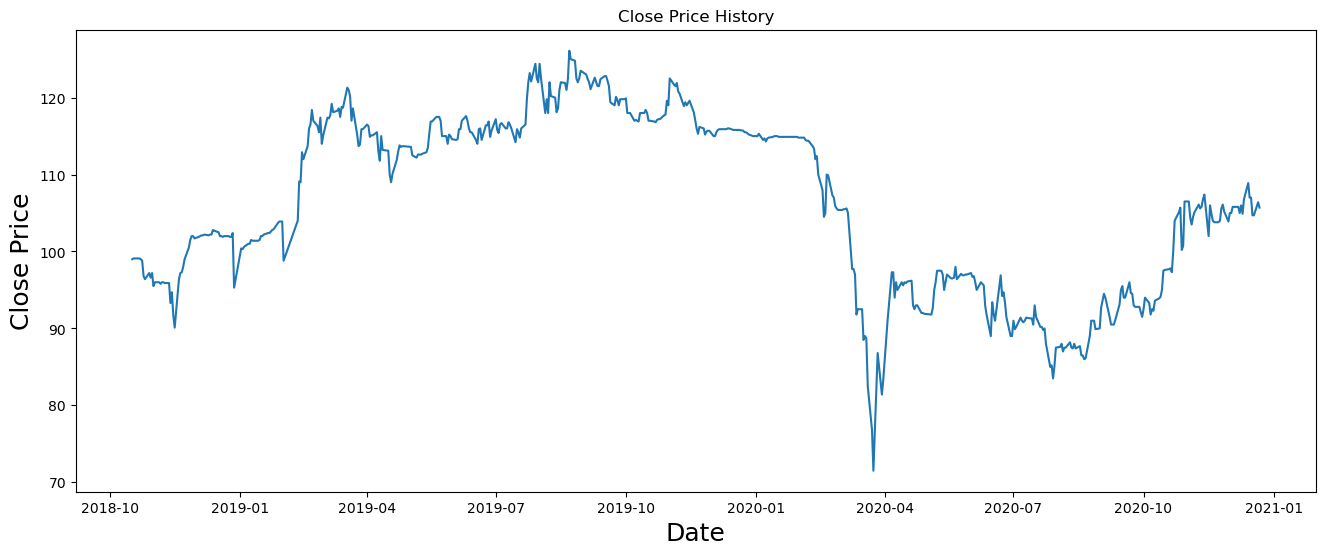

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(vic['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe with only the 'Close column 
data = vic.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

517

In [41]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.503663  , 0.50549451, 0.50549451, 0.50549451, 0.503663  ,
       0.5       , 0.46336996, 0.45604396, 0.47069597, 0.45970696,
       0.47069597, 0.43956044, 0.44871795, 0.44871795, 0.44505495,
       0.44871795, 0.44871795, 0.44688645, 0.44688645, 0.3992674 ,
       0.42490842, 0.36996337, 0.34065934, 0.45604396, 0.47069597,
       0.47252747, 0.48534799, 0.503663  , 0.53113553, 0.54945055,
       0.55860806, 0.55860806, 0.55311355, 0.55677656, 0.55860806,
       0.56043956, 0.56043956, 0.56227106, 0.56043956, 0.56227106,
       0.56227106, 0.57326007, 0.57142857, 0.56776557, 0.55860806,
       0.55860806, 0.55677656, 0.55860806, 0.55860806, 0.55677656,
       0.55677656, 0.56593407, 0.43589744, 0.52930403, 0.52747253,
       0.53296703, 0.54029304, 0.54029304, 0.54945055, 0.54761905])]
[0.5476190476190479]

[array([0.503663  , 0.50549451, 0.50549451, 0.50549451, 0.503663  ,
       0.5       , 0.46336996, 0.45604396, 0.47069597, 0.45970696,
       0.47069597, 0.43956044, 0.448

In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

457/457 [==============================] - 16s 28ms/step - loss: 0.0106


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 802ms/step


1.664892421986965

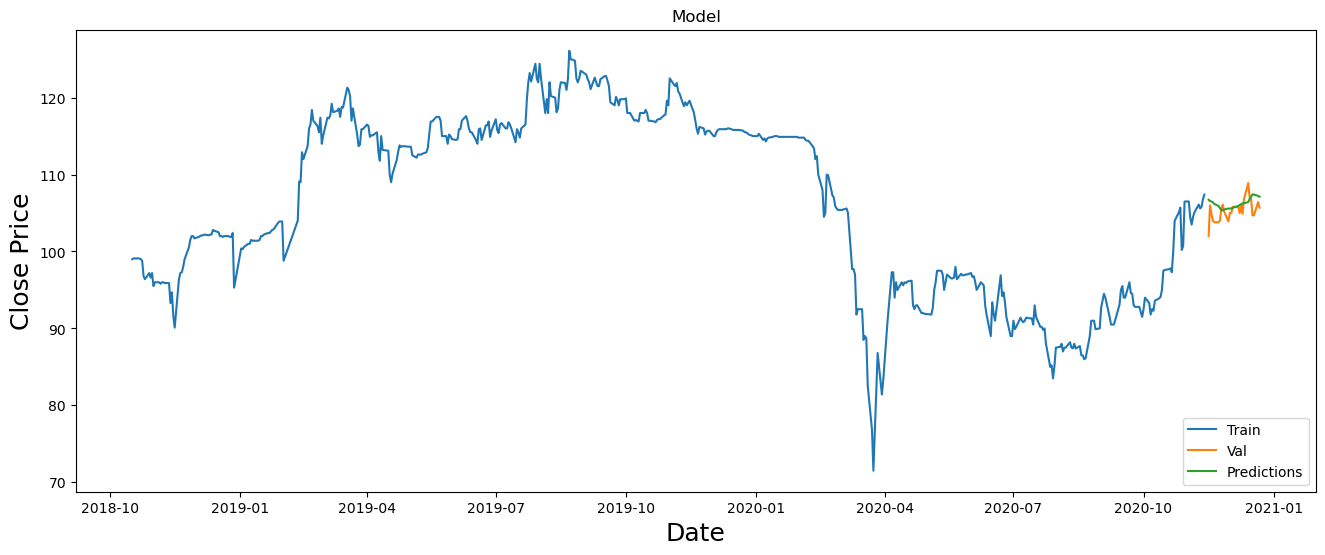

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-16,102.0,106.722542
2020-11-17,106.0,106.556366
2020-11-18,104.9,106.499413
2020-11-19,104.0,106.391312
2020-11-20,103.8,106.183060
2020-11-23,103.8,105.917206
2020-11-24,104.0,105.640305
2020-11-25,105.6,105.399879
2020-11-26,106.1,105.352242
